# Projeto de Detecção de Baleias - YOLOv8

## Inicialização

In [2]:
!nvidia-smi

Tue Jul  1 12:37:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.127.05             Driver Version: 550.127.05     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H100 80GB HBM3          On  |   00000000:1B:00.0 Off |                    0 |
| N/A   54C    P0            569W /  700W |   60090MiB /  81559MiB |     92%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
!nvcc --version

try:
    import google.colab
    _ON_COLAB = True
except:
    _ON_COLAB = False

print('Running on Google Colab = ', _ON_COLAB)
import os
import torch
from IPython import get_ipython
import os
# Definir o caminho base
if _ON_COLAB:
    BASE_PATH = "/content"
    import locale
    locale.getpreferredencoding = lambda: "UTF-8"
else:
    BASE_PATH = "/lapix" # trocar para o base path do seu computador se estiver rodando localmente, deixar /lapix se estiver rodando nos conteiners lapix
    VISIBLE_GPUS = [3] # Selecionar a GPU PARA RODAR! VER QUAL ESTA LIVRE

    if torch.cuda.device_count() != 8:
        print("GPU SETADA - PULANDO ETAPA")
    else:
        os.environ["CUDA_VISIBLE_DEVICES"] = str(VISIBLE_GPUS).replace("]", "").replace("[","").replace(" ", "")
        os.environ["NVIDIA_VISIBLE_DEVICES"] = str(VISIBLE_GPUS).replace("]", "").replace("[","").replace(" ", "")
        print("CUDA GPUS NUMBER: ", torch.cuda.device_count())
    
os.chdir(BASE_PATH) # garantir que está executando no caminho base definido

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Mar_28_02:18:24_PDT_2024
Cuda compilation tools, release 12.4, V12.4.131
Build cuda_12.4.r12.4/compiler.34097967_0
Running on Google Colab =  False
CUDA GPUS NUMBER:  1


In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 96.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.0/821.0 MB 76.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 74.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 79.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 69.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 79.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 85.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 

## Importação do Dataset

In [2]:
import zipfile
import os

# Supondo que o arquivo esteja no mesmo diretório e se chame 'whale_dataset.zip'
with zipfile.ZipFile("whale_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("whale_dataset")

# Verifique a estrutura
os.listdir("whale_dataset")


['train',
 'README.dataset.txt',
 'data.yaml',
 'valid',
 'test',
 'README.roboflow.txt']

## Treinamento do modelo

Utilizado os arquivos base do RoboFlow (yolov8s.pt e data.yaml) para treinar por 50 épocas.

In [3]:
from ultralytics import YOLO

# Carregue o modelo base
model = YOLO("yolov8s.pt")  # você pode trocar para 'n', 'm' etc.

# Treine o modelo
model.train(
    data="whale_dataset/data.yaml",  # Caminho para o arquivo YAML
    epochs=50,
    imgsz=640,
    batch=8,  # ajuste conforme a memória da sua GPU
    name="baleia_detector",
    workers=2
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/jovyan/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 174MB/s]


Ultralytics 8.3.160 🚀 Python-3.12.9 torch-2.7.1+cu126 CPU (Intel Xeon Platinum 8480C)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=whale_dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=baleia_detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

100%|██████████| 755k/755k [00:00<00:00, 18.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2116435  ultralytics.nn.modules.head.Detect           [1, [128, 256, 512]]          
Model summary: 129 layers, 11,135,987 parameters, 11,135,971 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1437.8±540.3 MB/s, size: 43.7 KB)


train: Scanning /home/jovyan/whale_dataset/train/labels... 430 images, 49 backgrounds, 0 corrupt: 100%|██████████| 430/430 [00:00<00:00, 1643.91it/s]

train: New cache created: /home/jovyan/whale_dataset/train/labels.cache
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1225.4±439.3 MB/s, size: 33.6 KB)



/opt/conda/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /home/jovyan/whale_dataset/valid/labels... 125 images, 0 backgrounds, 0 corrupt: 100%|██████████| 125/125 [00:00<00:00, 2025.13it/s]

val: New cache created: /home/jovyan/whale_dataset/valid/labels.cache



/opt/conda/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs/detect/baleia_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/baleia_detector
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.144      2.449      1.311         14        640: 100%|██████████| 54/54 [01:55<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.87s/it]

                   all        125        127      0.812      0.866      0.894      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.294      1.408      1.323          8        640: 100%|██████████| 54/54 [01:51<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.66s/it]

                   all        125        127      0.141      0.748      0.359       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.305      1.237      1.292          9        640: 100%|██████████| 54/54 [01:53<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.71s/it]

                   all        125        127      0.147      0.724      0.246      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.395      1.324      1.394          9        640: 100%|██████████| 54/54 [01:49<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.79s/it]

                   all        125        127      0.377      0.315      0.323      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G        1.3      1.191      1.385         10        640: 100%|██████████| 54/54 [01:52<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.48s/it]

                   all        125        127      0.615      0.756      0.756      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.308      1.126      1.332         16        640: 100%|██████████| 54/54 [01:50<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.57s/it]

                   all        125        127      0.803      0.843      0.911      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.273      1.096      1.328          9        640: 100%|██████████| 54/54 [01:43<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.60s/it]

                   all        125        127      0.869      0.843      0.935      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.202      1.106      1.267         12        640: 100%|██████████| 54/54 [01:46<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.57s/it]

                   all        125        127      0.934      0.896      0.963      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.113     0.9225      1.218         18        640: 100%|██████████| 54/54 [01:47<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.50s/it]

                   all        125        127      0.919      0.843       0.91      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.075      0.887      1.205         12        640: 100%|██████████| 54/54 [01:43<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.47s/it]

                   all        125        127      0.941      0.945      0.983      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.092     0.9159      1.215          8        640: 100%|██████████| 54/54 [01:49<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.68s/it]

                   all        125        127      0.905      0.897      0.957      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.109     0.9313      1.245         14        640: 100%|██████████| 54/54 [01:45<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.66s/it]

                   all        125        127      0.914      0.921      0.967       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      0.977     0.8211       1.15         14        640: 100%|██████████| 54/54 [01:36<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.72s/it]

                   all        125        127      0.967      0.922      0.973      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.035     0.8125      1.174         14        640: 100%|██████████| 54/54 [01:57<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.56s/it]

                   all        125        127      0.956      0.976      0.988      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.014     0.8193      1.179         11        640: 100%|██████████| 54/54 [01:45<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.67s/it]

                   all        125        127      0.934      0.961      0.988      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.032     0.8463      1.193          6        640: 100%|██████████| 54/54 [01:46<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.62s/it]

                   all        125        127      0.931      0.976      0.986       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.9907     0.8146      1.187         10        640: 100%|██████████| 54/54 [01:46<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.18s/it]

                   all        125        127      0.968      0.951      0.988      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.9235     0.7625      1.126          9        640: 100%|██████████| 54/54 [01:50<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.62s/it]

                   all        125        127      0.916      0.948      0.967      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G       1.01     0.7991      1.191         12        640: 100%|██████████| 54/54 [01:41<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.49s/it]

                   all        125        127       0.94      0.979      0.989      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.9854      0.771      1.142         11        640: 100%|██████████| 54/54 [01:50<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.43s/it]

                   all        125        127      0.969      0.991      0.994      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.9224     0.7243      1.128          6        640: 100%|██████████| 54/54 [01:46<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.58s/it]

                   all        125        127      0.969      0.969      0.984      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.8956     0.7304      1.106         13        640: 100%|██████████| 54/54 [01:49<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]

                   all        125        127      0.974      0.976       0.99      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.8878     0.7116      1.124          9        640: 100%|██████████| 54/54 [01:45<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.42s/it]

                   all        125        127      0.947      0.991      0.992      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      0.852     0.6657        1.1         13        640: 100%|██████████| 54/54 [02:00<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.86s/it]

                   all        125        127      0.969      0.971      0.992      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.8772     0.6672      1.081         15        640: 100%|██████████| 54/54 [01:52<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.50s/it]

                   all        125        127          1      0.968      0.994      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.8404     0.6712      1.081         11        640: 100%|██████████| 54/54 [01:48<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.59s/it]

                   all        125        127      0.969      0.984      0.991      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.8887     0.6824      1.118         10        640: 100%|██████████| 54/54 [01:38<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.60s/it]

                   all        125        127      0.987      0.969      0.993      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.8042     0.6362      1.079         10        640: 100%|██████████| 54/54 [01:45<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]

                   all        125        127      0.984      0.991      0.994      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.8327     0.6771      1.114          9        640: 100%|██████████| 54/54 [01:58<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.30s/it]

                   all        125        127      0.984      0.976      0.991      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.8089     0.6259      1.077          9        640: 100%|██████████| 54/54 [01:46<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.24s/it]

                   all        125        127      0.991      0.984      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.8029     0.6471      1.065          8        640: 100%|██████████| 54/54 [01:45<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.47s/it]

                   all        125        127       0.99      0.992      0.995      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.7776     0.6498      1.065         12        640: 100%|██████████| 54/54 [01:43<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.21s/it]

                   all        125        127      0.991      0.984      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.7899     0.6394      1.071         16        640: 100%|██████████| 54/54 [01:51<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]

                   all        125        127      0.984      0.983      0.994      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.7825      0.609      1.065          8        640: 100%|██████████| 54/54 [01:45<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.57s/it]

                   all        125        127      0.989      0.976      0.994      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.7699     0.6112      1.055         12        640: 100%|██████████| 54/54 [01:41<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.48s/it]

                   all        125        127      0.992      0.991      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.7359     0.5692      1.037          8        640: 100%|██████████| 54/54 [01:56<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.70s/it]

                   all        125        127      0.983      0.992      0.994      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.7364     0.5488      1.043          9        640: 100%|██████████| 54/54 [01:41<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.62s/it]

                   all        125        127      0.983      0.992      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.7807     0.5853      1.065          8        640: 100%|██████████| 54/54 [01:41<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.59s/it]

                   all        125        127          1      0.984      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.7648     0.6019      1.053         13        640: 100%|██████████| 54/54 [01:40<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all        125        127      0.998      0.976      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      0.732      0.568      1.042          8        640: 100%|██████████| 54/54 [01:38<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]

                   all        125        127      0.991      0.992      0.995      0.846


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/opt/conda/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
      41/50         0G     0.5634     0.4428     0.9398          5        640: 100%|██████████| 54/54 [01:39<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.60s/it]

                   all        125        127      0.984      0.992      0.995      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.5355     0.4131     0.9269          5        640: 100%|██████████| 54/54 [01:40<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]

                   all        125        127       0.99      0.992      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.5312     0.4062     0.9406          5        640: 100%|██████████| 54/54 [01:47<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        125        127      0.992      0.992      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.5105      0.394     0.9223          6        640: 100%|██████████| 54/54 [01:37<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.49s/it]

                   all        125        127      0.984      0.991      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.5201     0.3919     0.9212          5        640: 100%|██████████| 54/54 [01:40<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]

                   all        125        127      0.997      0.992      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.4963     0.3828       0.91          6        640: 100%|██████████| 54/54 [01:39<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.56s/it]

                   all        125        127          1       0.99      0.995       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.4934     0.3734      0.922          6        640: 100%|██████████| 54/54 [01:44<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.44s/it]

                   all        125        127      0.997      0.984      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.4686     0.3574     0.9037          4        640: 100%|██████████| 54/54 [01:38<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.36s/it]

                   all        125        127      0.991      0.992      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.4572     0.3587     0.9084          4        640: 100%|██████████| 54/54 [01:43<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.43s/it]

                   all        125        127      0.991      0.992      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.4536     0.3432     0.9114          6        640: 100%|██████████| 54/54 [01:40<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.65s/it]

                   all        125        127      0.991      0.992      0.995       0.89



50 epochs completed in 1.650 hours.
Optimizer stripped from runs/detect/baleia_detector/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/baleia_detector/weights/best.pt, 22.5MB

Validating runs/detect/baleia_detector/weights/best.pt...
Ultralytics 8.3.160 🚀 Python-3.12.9 torch-2.7.1+cu126 CPU (Intel Xeon Platinum 8480C)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.56s/it]


                   all        125        127      0.991      0.992      0.995      0.894
Speed: 0.7ms preprocess, 95.1ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/baleia_detector


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x713e3774fa10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Análises de Desempenho do modelo

### Desempenho por época

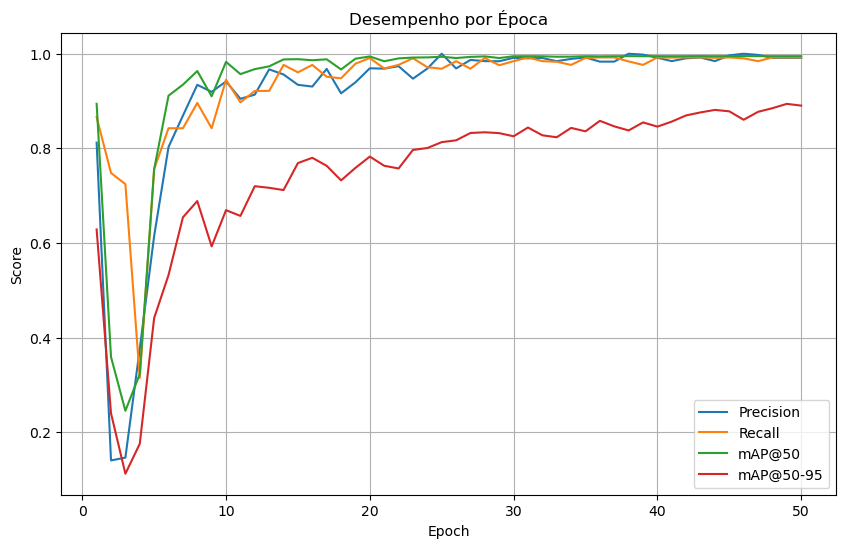

In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("runs/detect/baleia_detector/results.csv")

plt.figure(figsize=(10,6))
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@50-95")

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Desempenho por Época")
plt.legend()
plt.grid()
plt.show()

### Análise das perdas e do desempenho

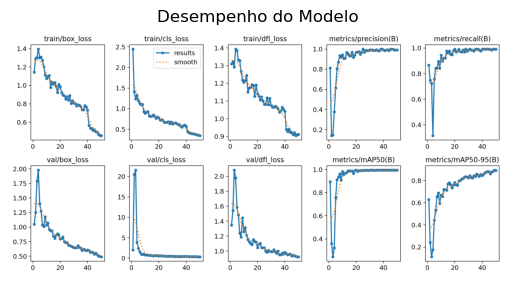

In [16]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("runs/detect/baleia_detector/results.png")
plt.imshow(img)
plt.axis('off')
plt.title("Desempenho do Modelo")
plt.show()

Percebe-se uma constante baixa em perda e alta precisão a partir da décima época, estabilizando enquanto se aproxima ao final do treinamento.

# Testes

## Primeiro vídeo

Link original: https://www.youtube.com/watch?v=wzlj2PqxqkA

In [20]:
from ultralytics import YOLO

# Carregar o modelo treinado
model = YOLO("runs/detect/baleia_detector/weights/best.pt")

# Rodar a detecção no vídeo e salvar o resultado
model.predict(
    source="video1.mp4",     # caminho do vídeo
    conf=0.10,                 # confiança mínima (ajuste se precisar)
    save=True,                 # salva o vídeo com as detecções
    save_txt=False,            # se quiser salvar os bounding boxes como texto
    show=False                 # defina como True se quiser exibir enquanto processa
)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/366) /home/jovyan/video1.mp4: 384x640 (no detections), 37.3ms
video 1/1 (frame 2/366) /home/jovyan/video1.mp4: 384x640 (no detections), 34.5ms
video 1/1 (frame 3/366) /home/jovyan/video1.mp4: 384x640 (no detections), 39.0ms
video 1/1 (frame 4/366) /home/jovyan/video1.mp4: 384x640 (no detections), 36.0ms
video 1/1 (frame 5/366) /home/jovyan/video1.mp4: 384x640 (no detections), 34.2ms
video 1/1 (frame 6/366) /home/jovyan/video1.mp4: 38

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fin'}
 obb: None
 orig_img: array([[[60, 45, 14],
         [60, 45, 14],
         [60, 45, 14],
         ...,
         [90, 72, 35],
         [90, 72, 35],
         [90, 72, 35]],
 
        [[60, 45, 14],
         [60, 45, 14],
         [60, 45, 14],
         ...,
         [90, 72, 35],
         [90, 72, 35],
         [90, 72, 35]],
 
        [[60, 45, 14],
         [60, 45, 14],
         [60, 45, 14],
         ...,
         [90, 72, 35],
         [90, 72, 35],
         [90, 72, 35]],
 
        ...,
 
        [[55, 39, 10],
         [55, 39, 10],
         [55, 39, 10],
         ...,
         [68, 54, 20],
         [68, 54, 20],
         [68, 54, 20]],
 
        [[55, 39, 10],
         [55, 39, 10],
         [55, 39, 10],
         ...,
         [68, 54, 20],
         [68, 54, 20],
         [68, 54, 20]],
 
        [[55, 39, 10],
       

## Segundo vídeo

Link original: https://www.youtube.com/watch?v=1sbBWt3kJt4

In [ ]:
from ultralytics import YOLO

# Carregar o modelo treinado
model = YOLO("runs/detect/baleia_detector/weights/best.pt")

# Rodar a detecção no vídeo e salvar o resultado
model.predict(
    source="video2.mp4",     # caminho do vídeo
    conf=0.25,                 # confiança mínima (ajuste se precisar)
    save=True,                 # salva o vídeo com as detecções
    save_txt=False,            # se quiser salvar os bounding boxes como texto
    show=False                 # defina como True se quiser exibir enquanto processa
)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/10223) /home/jovyan/video2.mp4: 384x640 (no detections), 55.8ms
video 1/1 (frame 2/10223) /home/jovyan/video2.mp4: 384x640 (no detections), 63.8ms
video 1/1 (frame 3/10223) /home/jovyan/video2.mp4: 384x640 (no detections), 56.9ms
video 1/1 (frame 4/10223) /home/jovyan/video2.mp4: 384x640 (no detections), 53.8ms
video 1/1 (frame 5/10223) /home/jovyan/video2.mp4: 384x640 (no detections), 59.5ms
video 1/1 (frame 6/10223) /home/jovyan/vi